In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_mem = pd.read_csv('/Users/eduardoaraujo/Downloads/memUF2023.csv')

df_mem = df_mem.loc[df_mem.UF == 'Rio de Janeiro']

df_mem

In [2]:
macros = pd.read_csv('../macro_saude.csv')

macros.loc[macros.geocode == 3106200]

,geocode,name_muni,name_region,code_region,name_macro,code_macro,state
2397,3106200,Belo Horizonte,Belo Horizonte/ Nova Lima/ Caeté,31016,Centro,3103,MG


In [3]:
df = pd.read_csv('../typical_inc_curves_uf.csv')
#df = pd.read_csv('../typical_inc_curves_macroregiao.csv')
df = df.loc[df.UF_id == 'MG']
#df = df.loc[df.macroregional_id == 3103]
df.head()

,Low,Median,High,UF,SE,UF_id,pop,LowCases,MedianCases,HighCases
780,1.810077,2.659411,3.907273,Minas Gerais,1,MG,21280697.0,385.197093,565.941199,831.494958
781,2.217766,3.110563,4.362770,Minas Gerais,2,MG,21280697.0,471.956134,661.949532,928.427774
782,2.325699,3.217359,4.450878,Minas Gerais,3,MG,21280697.0,494.924955,684.676524,947.177824
783,2.579397,3.191372,3.948541,Minas Gerais,4,MG,21280697.0,548.913755,679.146255,840.277059
784,2.649130,3.361174,4.264603,Minas Gerais,5,MG,21280697.0,563.753268,715.281150,907.537309


fig,ax = plt.subplots()

ax.plot(df_mem.SE, df_mem.V2)

ax.plot(df.SE, df.Median)

In [4]:
from epiweeks import Week

In [5]:
df_data = pd.read_csv('../data/dengue_MG.csv.gz', index_col = 'Unnamed: 0')
df_data.index = pd.to_datetime(df_data.index)
df_data = df_data.sort_index()

df_data['week_year'] = [Week.fromdate(x).year for x in df_data.index]

df_data.head()

,casos_est_3101,p_rt1_3101,Rt_3101,casos_est_3102,p_rt1_3102,Rt_3102,casos_est_3103,p_rt1_3103,Rt_3103,casos_est_3104,...,diff_casos_est_3107,diff_casos_est_3108,diff_casos_est_3109,diff_casos_est_3110,diff_casos_est_3111,diff_casos_est_3112,diff_casos_est_3113,diff_casos_est_3114,diff_casos_est_MG,week_year
2010-01-03,12.0,0.0,0.0,4.0,0.0,0.0,614.0,0.0,0.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
2010-01-10,10.0,0.0,0.0,3.0,0.0,0.0,892.0,0.0,0.0,78.0,...,103.0,211.0,61.0,3.0,44.0,40.0,69.0,9.0,935.0,2010
2010-01-17,28.0,0.0,0.0,6.0,0.0,0.0,1092.0,0.0,0.0,85.0,...,-26.0,284.0,63.0,-7.0,34.0,46.0,-20.0,22.0,927.0,2010
2010-01-24,55.0,0.0,0.0,6.0,0.0,0.0,1673.0,0.0,0.0,84.0,...,8.0,571.0,147.0,4.0,42.0,17.0,-32.0,7.0,1539.0,2010
2010-01-31,74.0,0.0,0.0,2.0,0.0,0.0,2298.0,0.0,0.0,34.0,...,70.0,-65.0,161.0,20.0,64.0,-44.0,59.0,9.0,984.0,2010


<Axes: >

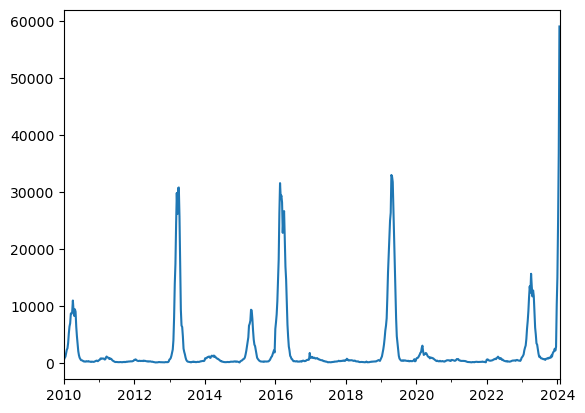

In [6]:
df_data.casos_est_3103.plot()

In [7]:
import numpy as np

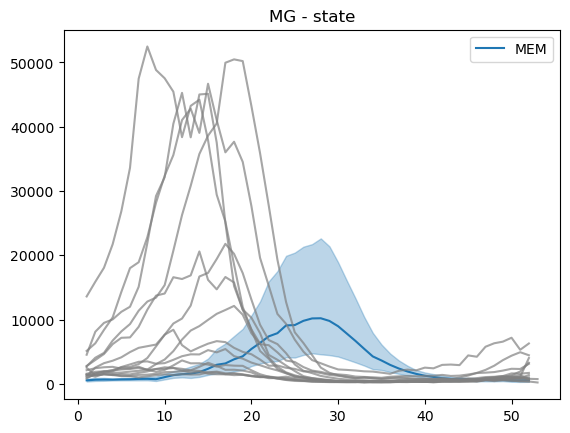

In [8]:
fig,ax = plt.subplots()

ax.plot(df.SE, df.MedianCases, label = 'MEM')

ax.fill_between(df.SE, df.LowCases, df.HighCases, color = 'tab:blue', alpha = 0.3)

for y in np.arange(2010, 2024):
    
    dfs = df_data.loc[df_data.week_year == y]
    
    ax.plot(dfs.SE, dfs.casos_est_MG, color = 'gray', alpha = 0.7)
    #ax.plot(dfs.SE, dfs.casos_est_3103, color = 'gray', alpha = 0.7)

#ax.plot(dfs.SE, dfs.casos_est_RJ, color = 'gray', label = 'Anos anteriores', alpha = 0.7)

ax.legend()

ax.set_title('MG - state')

#ax.set_title('RJ - macrorregião 3311')
plt.show()


In [11]:
dfs

,casos_est_3101,p_rt1_3101,Rt_3101,casos_est_3102,p_rt1_3102,Rt_3102,casos_est_3103,p_rt1_3103,Rt_3103,casos_est_3104,...,diff_casos_est_3107,diff_casos_est_3108,diff_casos_est_3109,diff_casos_est_3110,diff_casos_est_3111,diff_casos_est_3112,diff_casos_est_3113,diff_casos_est_3114,diff_casos_est_MG,week_year
2023-01-01,310.0,0.269504,1.126347,25.0,0.376980,1.151674,901.0,0.477666,2.815006,32.0,...,100.0,349.0,172.0,27.0,215.0,255.0,262.0,116.0,2007.0,2023
2023-01-08,424.0,0.316410,1.141919,33.0,0.337010,0.317373,1043.0,0.527382,2.142654,31.0,...,36.0,491.0,34.0,4.0,192.0,55.0,-2.0,19.0,1185.0,2023
2023-01-15,534.0,0.308574,1.120728,48.0,0.402061,1.299694,1228.0,0.413587,1.041924,30.0,...,160.0,620.0,238.0,30.0,184.0,99.0,299.0,78.0,2084.0,2023
2023-01-22,712.0,0.319262,1.535147,48.0,0.403412,0.893797,1496.0,0.513682,1.759599,51.0,...,118.0,792.0,34.0,34.0,184.0,146.0,40.0,4.0,1933.0,2023
2023-01-29,1059.0,0.373856,2.046771,50.0,0.388151,1.021921,2215.0,0.617609,2.454165,86.0,...,228.0,1244.0,232.0,62.0,139.0,142.0,422.0,121.0,3964.0,2023
2023-02-05,1524.0,0.386173,1.653110,56.0,0.407062,1.691371,2672.0,0.598543,2.329407,87.0,...,-107.0,1248.0,352.0,140.0,38.0,223.0,538.0,35.0,3705.0,2023
2023-02-12,1915.0,0.416312,1.719228,67.0,0.380510,0.634133,3051.0,0.559704,1.846977,110.0,...,-96.0,361.0,5.0,145.0,-167.0,-130.0,-23.0,7.0,918.0,2023
2023-02-19,2669.0,0.465896,2.115959,129.0,0.434954,0.924796,4190.0,0.595604,1.983102,142.0,...,134.0,-184.0,262.0,308.0,-191.0,253.0,615.0,205.0,3889.0,2023
2023-02-26,2999.0,0.514311,1.981236,232.0,0.523283,2.029185,6012.0,0.645386,1.872581,180.0,...,392.0,-354.0,396.0,300.0,39.0,417.0,762.0,469.0,5355.0,2023
2023-03-05,3922.0,0.558886,2.377031,293.0,0.472172,1.065171,7337.0,0.733604,2.820971,217.0,...,289.0,-804.0,206.0,308.0,-160.0,654.0,448.0,118.0,4207.0,2023


In [9]:
from epiweeks import Week